# Hypothesen Tests
In diesem Notebook versuchen wir uns die meisten der Hypothesen anzuschauen, die vor der Datenerhebung erstellt worden sind. Die Wahl der Methoden die hier angewendet werden und die Gründe dafür werden in der folgenden Quelle ausführlicher beschrieben:

- https://bookdown.org/Rmadillo/likert/

Zusammenfassen lässt sich der Umgang mit dem Datensatz wie folgt:
 - Mittelwert Vergleiche mit Likert Skala Daten funktionieren meist nicht gut, da die Abstände zwischen den Wahloptionen nicht klar definiert sind (Wie groß ist der Unterschied zwischen Option 2 und 1 ?). In diesem Datensatz kommt dazu noch das Problem, das aus UX Gründen eine neutrale Wahloption ausgeschlossen wurde. Deshalb lassen sich Methoden die Mittelwerte vergleichen hier nicht korrekt anwenden.
 - Viele Hypothesentests werden bei kleineren Unterschieden zwischen den Gruppen signifikanter, je größer der Datensatz ist. Bei der Größe unseres Datensatzes sollte man sich deshalb nicht auf klassische Hypothesentests verlassen. Eine Kombination aus Visualisierung, Konfidenzintervalle und Proportional Odds Regression sollen deshalb helfen, Unterschiede fest zu stellen.
 - Da die Merkmale im Datensatz nicht für alle Gruppen und Hypothesen gleich verteilt sind, werden zudem die Größe der Gruppen visualisiert.

In [1]:
import pandas as pd
from src.visualization.visualize import likert_plot, likert_plot_tab, group_comparison
from src.data import load_full_data
from src.exploration.explore import test_hypothesis, build_likelihood_ratio_test
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

### Notes:
- MS = HVS
- CP = Seitenraum
- SE = NVS

In [2]:
full_data_df = load_full_data()
bike_data = {}
bike_data["ms"] = full_data_df[full_data_df["Experiment"] == "MS"].dropna(axis=1, how="all")
bike_data["ms"] = bike_data["ms"][bike_data["ms"]["Kamera"] == "A"]
bike_data["cp"] = full_data_df[full_data_df["Experiment"] == "CP"].dropna(axis=1, how="all")
bike_data["cp"] = bike_data["cp"][bike_data["cp"]["Kamera"] == "A"]
bike_data["se"] = full_data_df[full_data_df["Experiment"] == "SE"].dropna(axis=1, how="all")
bike_data["se"] = bike_data["se"][bike_data["se"]["Kamera"] == "A"]

# 0. Profilfragen
## a) Geschlecht

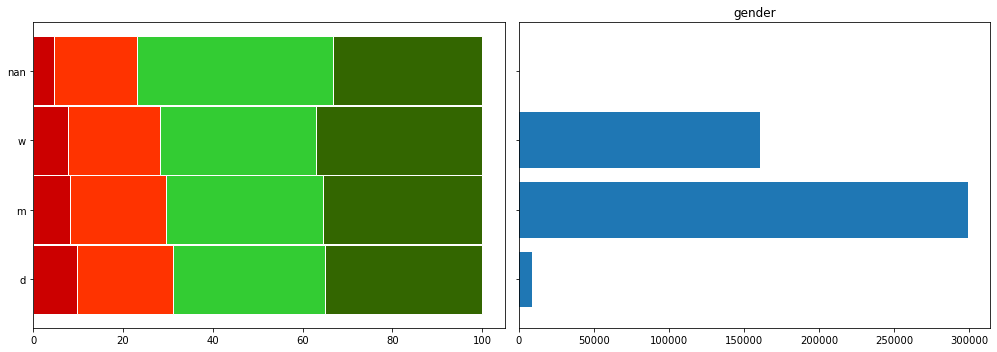

       unsafe  almost_unsafe  almost_safe       safe
d    9.831594      21.240512    33.906546  35.021347
m    8.185250      21.410971    34.955650  35.448129
w    7.824049      20.332307    34.931507  36.912137
NaN  4.675325      18.441558    43.636364  33.246753


In [3]:
df = full_data_df
likert_plot (df[["gender","rating"]])

## b) Alter

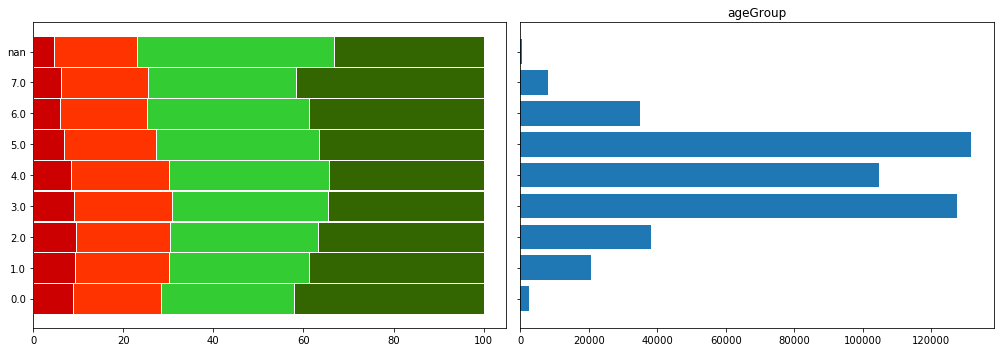

       unsafe  almost_unsafe  almost_safe       safe
0.0  8.922697      19.490132    29.481908  42.105263
1.0  9.367420      20.752886    31.124479  38.755215
2.0  9.452893      20.825782    32.878943  36.842382
3.0  9.149358      21.724335    34.507092  34.619215
4.0  8.353393      21.826761    35.510278  34.309567
5.0  6.902527      20.468174    36.023561  36.605738
6.0  6.061991      19.217255    35.969147  38.751607
7.0  6.204244      19.344832    32.696364  41.754560
NaN  4.675325      18.441558    43.636364  33.246753


In [4]:
df = full_data_df
likert_plot (df[["ageGroup","rating"]])


## c) Nutzungshäufigkeit Fahrrad

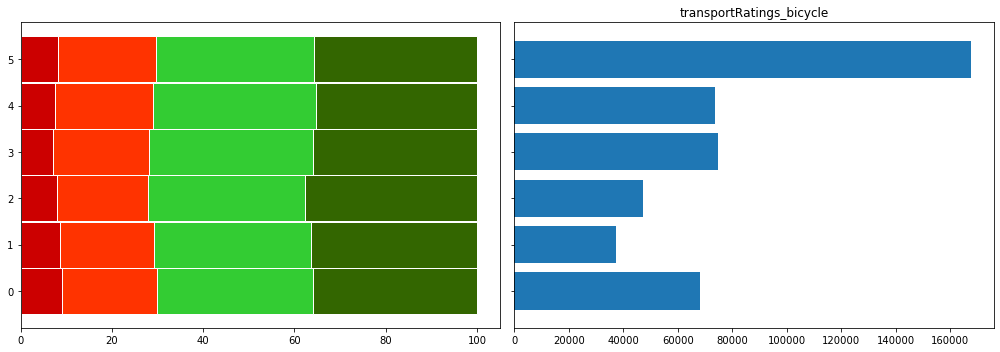

     unsafe  almost_unsafe  almost_safe       safe
0  9.122029      20.652014    34.344607  35.881350
1  8.619391      20.588077    34.345744  36.446788
2  7.983095      19.878098    34.502092  37.636715
3  7.195407      21.030776    35.828827  35.944990
4  7.542612      21.504180    35.653024  35.300185
5  8.219178      21.413216    34.713547  35.654059


In [5]:
df = full_data_df
likert_plot (df[["transportRatings_bicycle","rating"]])

## d) Dauer Fahrradnutzung

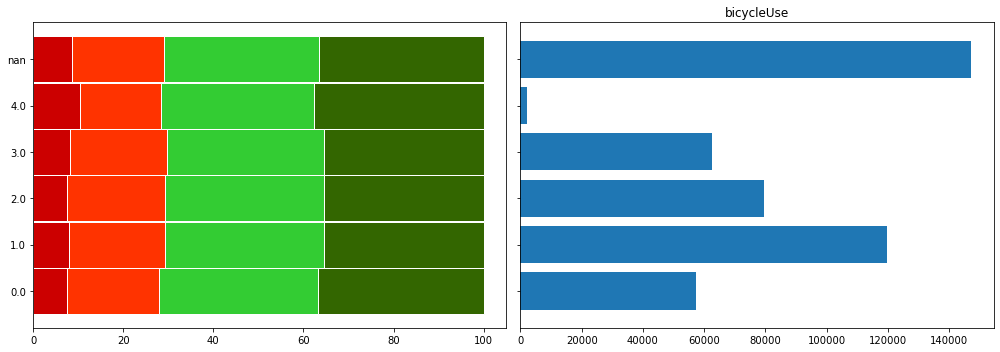

        unsafe  almost_unsafe  almost_safe       safe
0.0   7.512106      20.525865    35.296586  36.665443
1.0   7.911432      21.367136    35.272533  35.448900
2.0   7.564696      21.650639    35.262058  35.522606
3.0   8.155553      21.615804    34.714117  35.514525
4.0  10.331931      17.999065    33.987845  37.681159
NaN   8.677077      20.430356    34.453599  36.438968


In [6]:
df = full_data_df
likert_plot (df[["bicycleUse","rating"]])

# 1. Auswertung MS
Anmerkung zu Plots (von Tümer): test_hypothesis nutzt halt den Median. Der Plot ist etwas unpräzise, weil er nur die absoluten Werte (0,1,2,3) nimmt. Median von pandas nimmt aber, wenn man genau in der Mitte zwischen zwei Werten steht dann den Mittelwert aus den beiden. Deshalb gibt es in der Gruppe auch Werte wie 2.5. Das ist wichtig für das korrekte testen der Hypothesen. Wenn du jetzt die Balken vom Plot nimmst, fehlen halt die Zwischenwerte.
Deswegen gelten eher die Werte sicher Gruppe1/2 (sicher = safe+almost safe)

### a) Einflussfaktor "Radverkehrsanlage vorhanden" (BS: 1 vs. 2-6)
Gruppe1: Hauptverkehrsstraßen ohne RVA <br>
Gruppe2: Hauptverkehrsstraßen mit RVA und Busstreifen

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

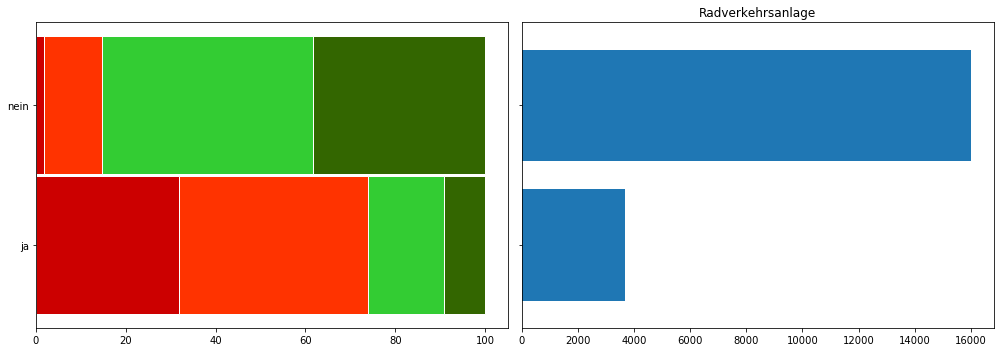

           unsafe  almost_unsafe  almost_safe       safe
group1  31.877551      42.095238    16.938776   9.088435
group2   1.773559      12.917629    47.055517  38.253294
Mittelwert von  ja - 1.0323809523809524
Mittelwert von  nein - 2.2178854680572035
Bootstrap Ergebnis: -50.0    (-50.0, -50.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -53.452016921086326
Ist der Unterschied signifikant? True
sicher Gruppe 1  25.414965986394556 sicher Gruppe2 82.98882158246425
Ergebnisse für Gruppe  w


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

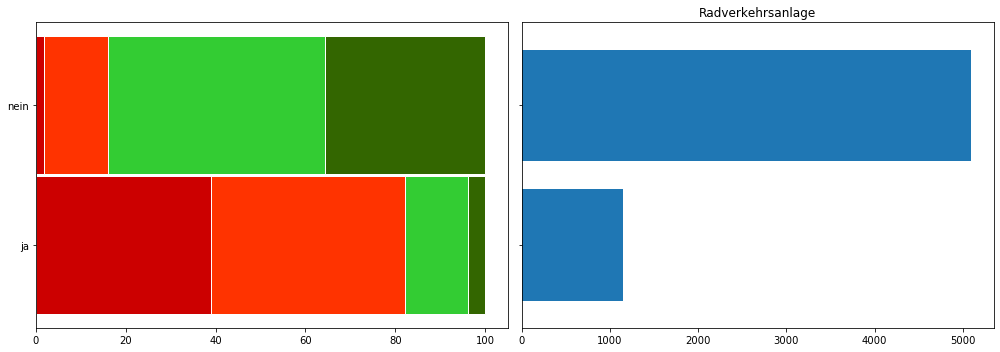

           unsafe  almost_unsafe  almost_safe       safe
group1  38.980836      43.162021    14.067944   3.789199
group2   1.775903      14.217033    48.371272  35.635793
Mittelwert von  ja - 0.8266550522648084
Mittelwert von  nein - 2.1786695447409734
Bootstrap Ergebnis: -50.0    (-50.0, -50.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -62.05688677017371
Ist der Unterschied signifikant? True
sicher Gruppe 1  17.421602787456447 sicher Gruppe2 81.49529042386186
Ergebnisse für Gruppe  m


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

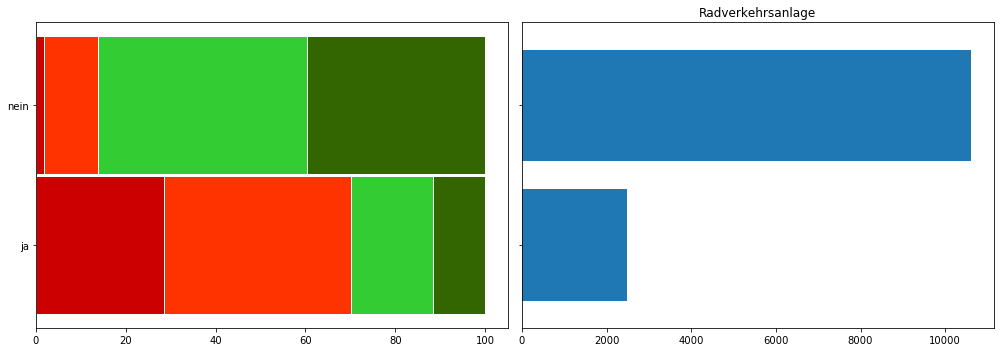

           unsafe  almost_unsafe  almost_safe       safe
group1  28.562778      41.582560    18.328623  11.526040
group2   1.743309      12.174896    46.527516  39.554278
Mittelwert von  ja - 1.1281792490916431
Mittelwert von  nein - 2.238927629099133
Bootstrap Ergebnis: -50.0    (-50.0, -50.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -49.6107317436793
Ist der Unterschied signifikant? True
sicher Gruppe 1  29.148163100524826 sicher Gruppe2 83.85789672069356
Ergebnisse für Gruppe  u30


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

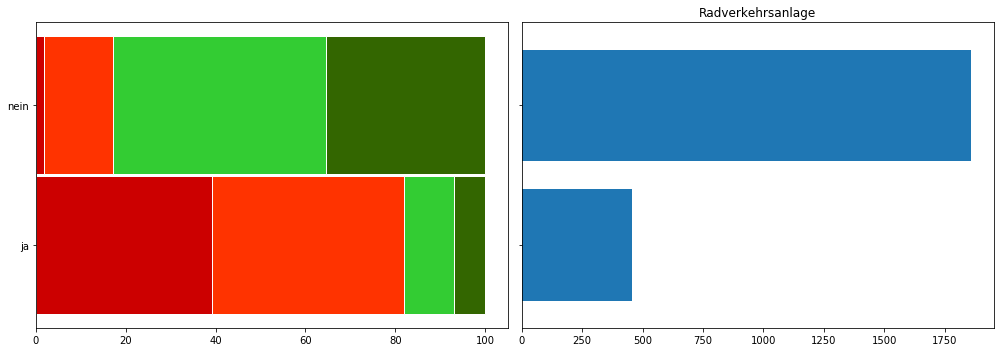

           unsafe  almost_unsafe  almost_safe       safe
group1  39.254386      42.763158    11.074561   6.907895
group2   1.827957      15.268817    47.392473  35.510753
Mittelwert von  ja - 0.856359649122807
Mittelwert von  nein - 2.1658602150537636
Bootstrap Ergebnis: -50.0    (-50.0, -50.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -60.460991749573765
Ist der Unterschied signifikant? True
sicher Gruppe 1  17.543859649122805 sicher Gruppe2 80.16129032258064
Ergebnisse für Gruppe  30-64


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

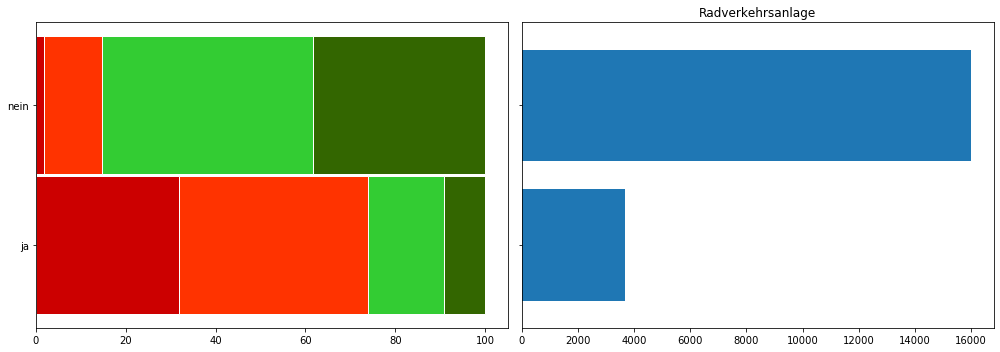

           unsafe  almost_unsafe  almost_safe       safe
group1  31.877551      42.095238    16.938776   9.088435
group2   1.774667      12.913204    47.038055  38.274074
Mittelwert von  ja - 1.0323809523809524
Mittelwert von  nein - 2.218115353371243
Bootstrap Ergebnis: -50.0    (-50.0, -50.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -53.45684115067012
Ist der Unterschied signifikant? True
sicher Gruppe 1  25.414965986394556 sicher Gruppe2 82.99068924576642
Ergebnisse für Gruppe  Ü64


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

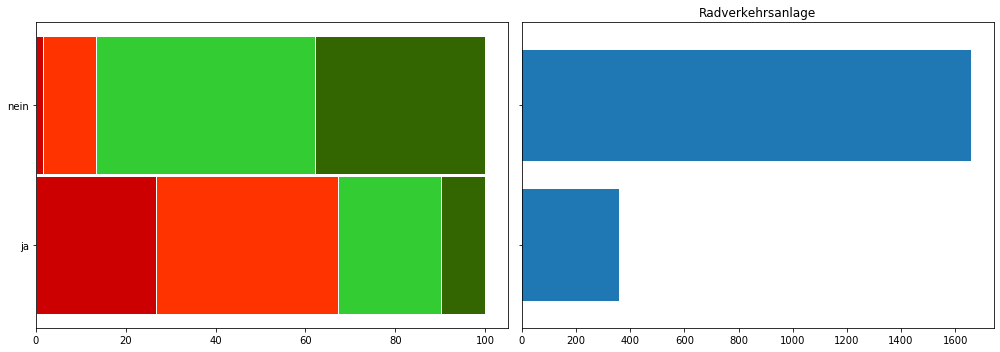

           unsafe  almost_unsafe  almost_safe       safe
group1  26.675978      40.502793    23.044693   9.776536
group2   1.506932      11.934901    48.704039  37.854129
Mittelwert von  ja - 1.1592178770949721
Mittelwert von  nein - 2.229053646775166
Bootstrap Ergebnis: -50.0    (-50.0, -50.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -47.99506603297569
Ist der Unterschied signifikant? True
sicher Gruppe 1  31.564245810055862 sicher Gruppe2 84.56901748040988
Ergebnisse für Gruppe  selten Rad


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

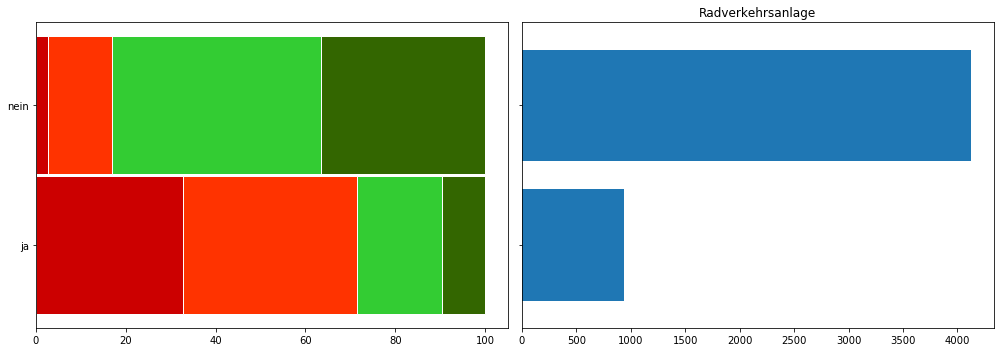

           unsafe  almost_unsafe  almost_safe       safe
group1  32.659574      38.882979    18.882979   9.574468
group2   2.690257      14.311682    46.388754  36.609307
Mittelwert von  ja - 1.0537234042553192
Mittelwert von  nein - 2.1691711100339313
Bootstrap Ergebnis: -50.0    (-50.0, -50.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -51.422762391536914
Ist der Unterschied signifikant? True
sicher Gruppe 1  27.4468085106383 sicher Gruppe2 80.63499757634513
Ergebnisse für Gruppe  regelmäßig Rad


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

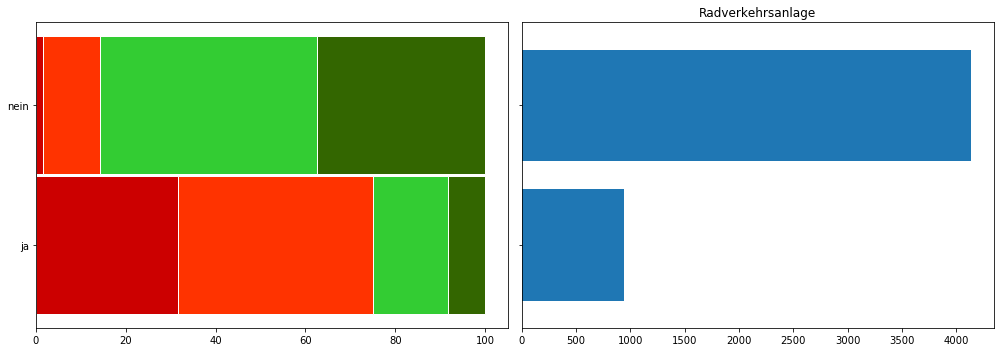

           unsafe  almost_unsafe  almost_safe       safe
group1  31.716418      43.390192    16.684435   8.208955
group2   1.558347      12.635902    48.417492  37.388258
Mittelwert von  ja - 1.0138592750533049
Mittelwert von  nein - 2.2163566078762984
Bootstrap Ergebnis: -50.0    (-50.0, -50.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -54.25558903967266
Ist der Unterschied signifikant? True
sicher Gruppe 1  24.4136460554371 sicher Gruppe2 83.49842957236046
Ergebnisse für Gruppe  oft Rad


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

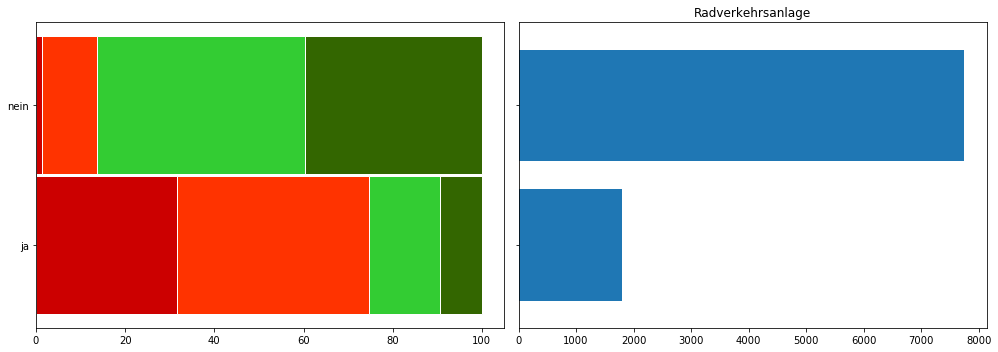

           unsafe  almost_unsafe  almost_safe       safe
group1  31.552588      43.099610    16.054535   9.293267
group2   1.400361      12.325761    46.683015  39.590862
Mittelwert von  ja - 1.0308848080133557
Mittelwert von  nein - 2.244643779039752
Bootstrap Ergebnis: -50.0    (-50.0, -50.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -54.0735675905616
Ist der Unterschied signifikant? True
sicher Gruppe 1  24.874791318864776 sicher Gruppe2 83.97005678884874


In [7]:
df = bike_data["ms"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'w')
group1 = df_w[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df_w[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ',  'm')
group1 = df_m[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df_m[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'u30')
group1 = df_u30[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df_u30[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)

print('Ergebnisse für Gruppe ', '30-64')
group1 = df_30_64[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df_30_64[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'Ü64')
group1 = df_ue64[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df_ue64[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'selten Rad')
group1 = df_Bs[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df_Bs[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'regelmäßig Rad')
group1 = df_Br[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df_Br[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'oft Rad')
group1 = df_Bo[(df["RVA-Breite"] == 0) & (df["FS-Art"] != "Bus")] [["rating", "sessionID"]]
group2 = df_Bo[(df["RVA-Breite"] != 0) | (df["FS-Art"] == "Bus")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radverkehrsanlage", ["ja", "nein"])
group_comparison(group1,group2)


### b) Einflussfaktor "Gesamtbreite Radverkehrsanlage" (BS 2 bis 5)
Gruppe1: Hauptverkehrsstraßen mit RVA; Gesamtbreite RVA = "schmal"<br>
Gruppe2: Hauptverkehrsstraßen mit RVA; Gesamtbrete RVA = "breit"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

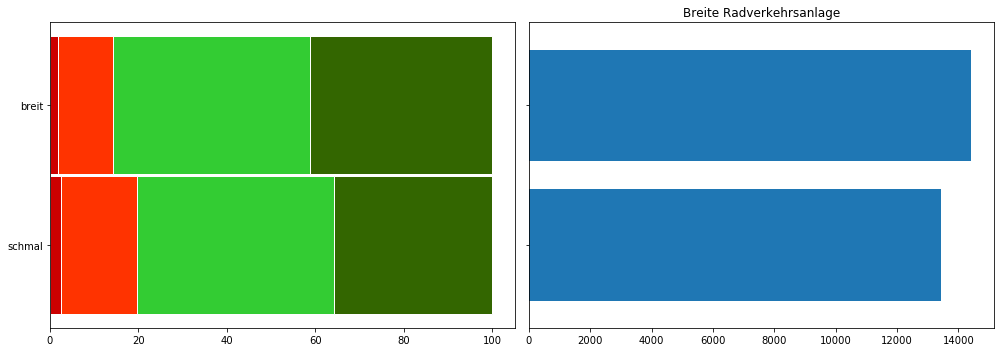

          unsafe  almost_unsafe  almost_safe       safe
group1  2.550830      17.014225    44.704699  35.730245
group2  1.885485      12.314571    44.572300  41.227645
Mittelwert von  schmal - 2.136143591271319
Mittelwert von  breit - 2.251421045334812
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -5.120208603466697
Ist der Unterschied signifikant? True
sicher Gruppe 1  77.74633201757652 sicher Gruppe2 83.48121447386663
Ergebnisse für Gruppe  w


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

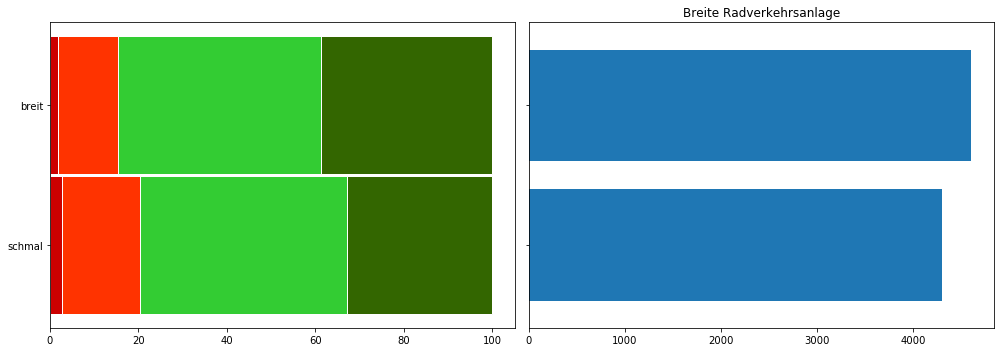

          unsafe  almost_unsafe  almost_safe       safe
group1  2.698302      17.585485    46.871365  32.844848
group2  1.780673      13.496200    46.026059  38.697068
Mittelwert von  schmal - 2.098627587811119
Mittelwert von  breit - 2.2163952225841475
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -5.313476295789903
Ist der Unterschied signifikant? True
sicher Gruppe 1  76.90160502442428 sicher Gruppe2 82.14983713355049
Ergebnisse für Gruppe  m


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

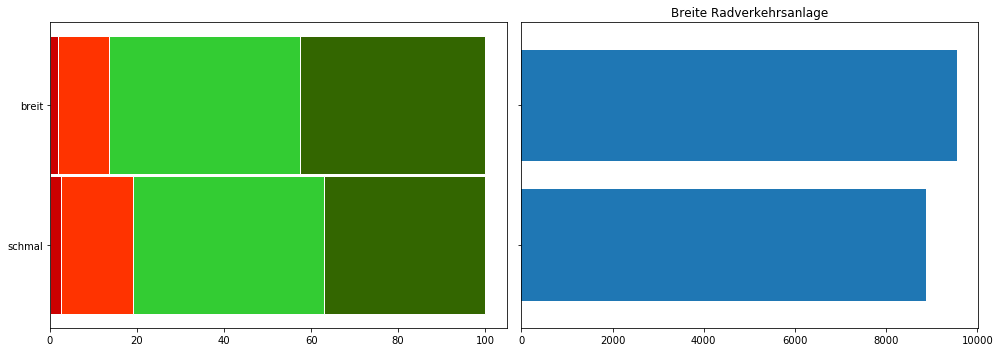

          unsafe  almost_unsafe  almost_safe       safe
group1  2.433529      16.567147    43.859847  37.139477
group2  1.906957      11.604149    43.980511  42.508382
Mittelwert von  schmal - 2.157052726453357
Mittelwert von  breit - 2.270903185247276
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -5.013443969498049
Ist der Unterschied signifikant? True
sicher Gruppe 1  78.36863452005407 sicher Gruppe2 84.31475272422465
Ergebnisse für Gruppe  u30


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

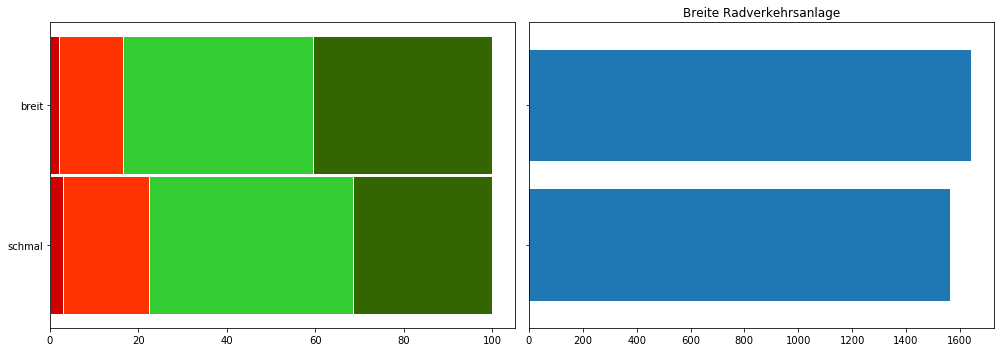

          unsafe  almost_unsafe  almost_safe       safe
group1  3.003195      19.488818    45.878594  31.629393
group2  2.008521      14.485697    43.000609  40.505173
Mittelwert von  schmal - 2.061341853035144
Mittelwert von  breit - 2.220024345709069
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -7.147781643955002
Ist der Unterschied signifikant? True
sicher Gruppe 1  74.50479233226837 sicher Gruppe2 80.52343274497869
Ergebnisse für Gruppe  30-64


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

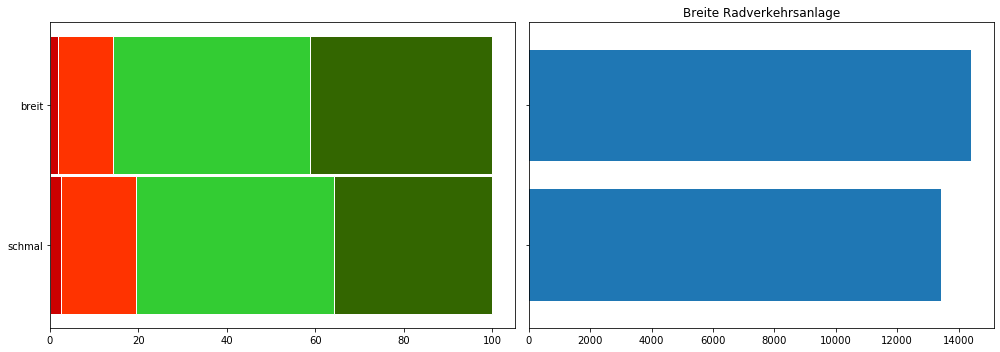

          unsafe  almost_unsafe  almost_safe       safe
group1  2.552541      16.999553    44.693695  35.754211
group2  1.886662      12.308386    44.561975  41.242977
Mittelwert von  schmal - 2.1364957519749592
Mittelwert von  breit - 2.251612679475619
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -5.112643419980632
Ist der Unterschied signifikant? True
sicher Gruppe 1  77.76121627664332 sicher Gruppe2 83.49171117430811
Ergebnisse für Gruppe  Ü64


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

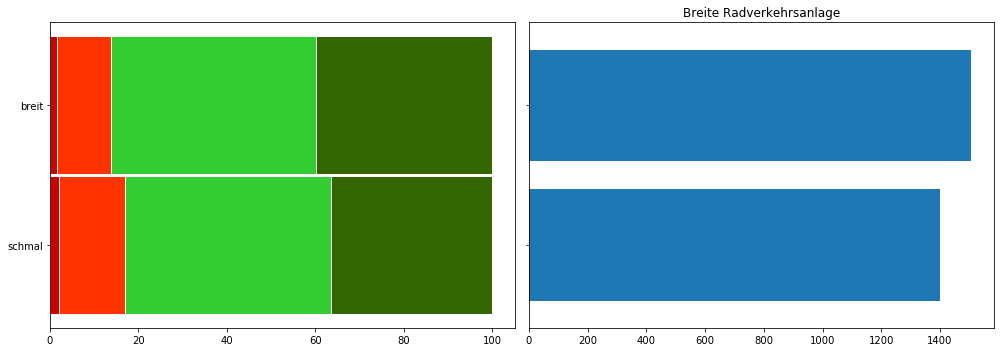

          unsafe  almost_unsafe  almost_safe       safe
group1  2.034261      14.917916    46.466809  36.581014
group2  1.592568      12.110153    46.516257  39.781022
Mittelwert von  schmal - 2.1759457530335475
Mittelwert von  breit - 2.244857332448573
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -3.0697531829276885
Ist der Unterschied signifikant? True
sicher Gruppe 1  80.29978586723769 sicher Gruppe2 84.40610484406105
Ergebnisse für Gruppe  selten Rad


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

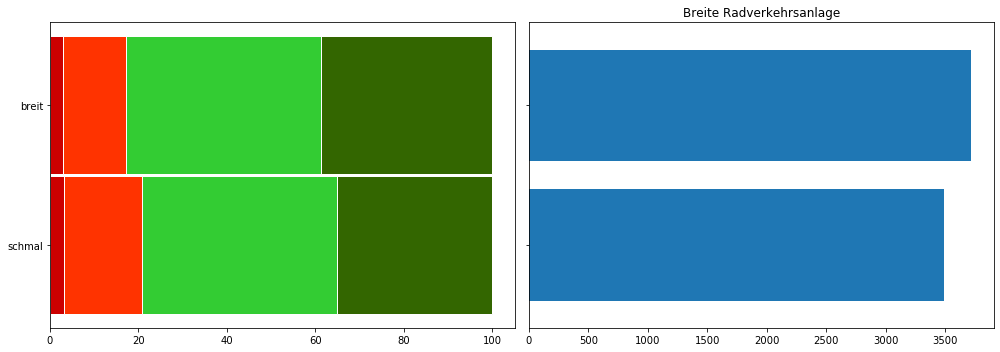

          unsafe  almost_unsafe  almost_safe       safe
group1  3.232265      17.477117    44.193364  35.097254
group2  2.860596      14.262691    44.037067  38.839645
Mittelwert von  schmal - 2.1115560640732265
Mittelwert von  breit - 2.1885576148267525
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -3.5183698264037466
Ist der Unterschied signifikant? True
sicher Gruppe 1  76.43020594965677 sicher Gruppe2 80.52645715820576
Ergebnisse für Gruppe  regelmäßig Rad


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

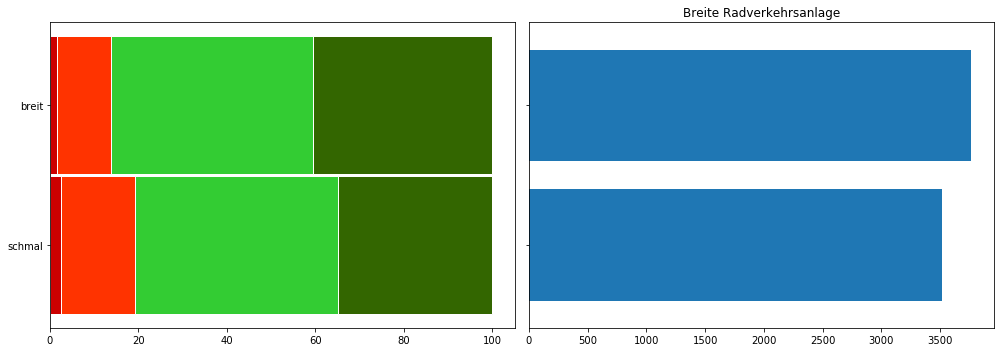

          unsafe  almost_unsafe  almost_safe       safe
group1  2.487916      16.704578    45.948251  34.859255
group2  1.526819      12.161445    45.724907  40.586830
Mittelwert von  schmal - 2.1317884560705145
Mittelwert von  breit - 2.253717472118959
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -5.410128712087683
Ist der Unterschied signifikant? True
sicher Gruppe 1  78.1063406312198 sicher Gruppe2 83.90865639936273
Ergebnisse für Gruppe  oft Rad


C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

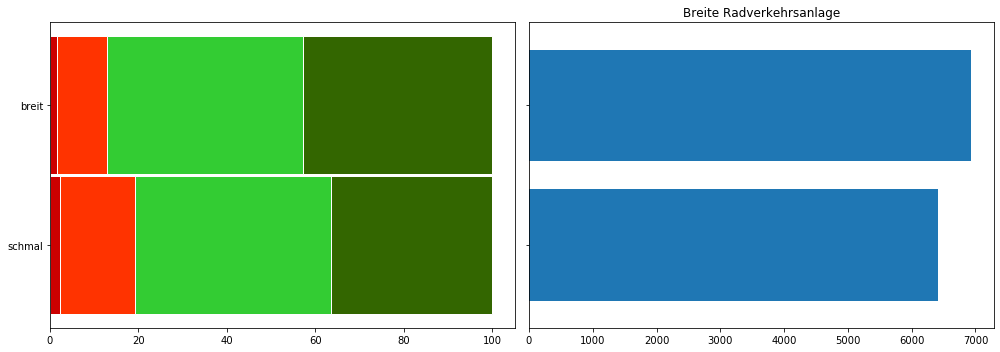

          unsafe  almost_unsafe  almost_safe       safe
group1  2.213907      16.931712    44.301528  36.552853
group2  1.556869      11.352170    44.233819  42.857143
Mittelwert von  schmal - 2.151933270969754
Mittelwert von  breit - 2.283912354043535
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -5.778640447393688
Ist der Unterschied signifikant? True
sicher Gruppe 1  78.26629248518864 sicher Gruppe2 84.8349430589592


In [8]:
df = bike_data["ms"]
df = df[df["RVA-Breite"] != 0]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'w')
group1 = df_w[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df_w[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ',  'm')
group1 = df_m[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df_m[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'u30')
group1 = df_u30[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df_u30[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)

print('Ergebnisse für Gruppe ', '30-64')
group1 = df_30_64[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df_30_64[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'Ü64')
group1 = df_ue64[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df_ue64[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'selten Rad')
group1 = df_Bs[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df_Bs[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'regelmäßig Rad')
group1 = df_Br[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df_Br[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)

print ('Ergebnisse für Gruppe ', 'oft Rad')
group1 = df_Bo[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df_Bo[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite Radverkehrsanlage", ["schmal", "breit"])
group_comparison(group1,group2)


### c) Einflussfaktor "Tempolimit" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens)
Gruppe1: Kfz-Hauptverkehrsstraßen Tempolimt = "30"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Tempolimt = "50"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

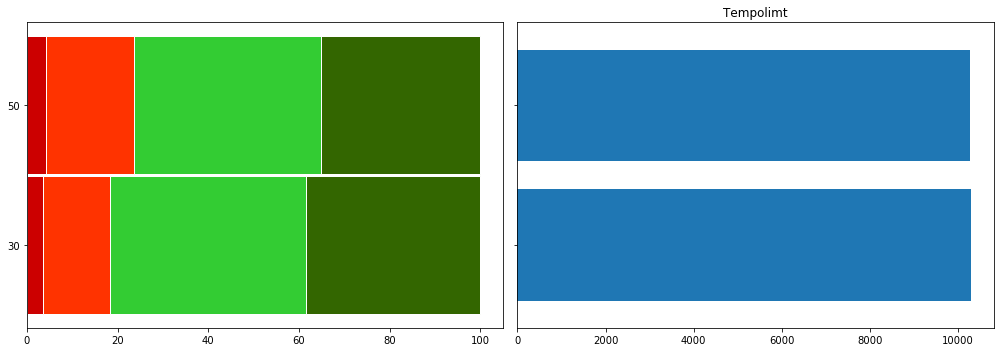

          unsafe  almost_unsafe  almost_safe       safe
group1  3.439565      14.841625    43.179168  38.539642
group2  4.177622      19.442010    41.157854  35.222514
Mittelwert von  30 - 2.16818888457054
Mittelwert von  50 - 2.0742526049274517
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von 30 zu 50 (in Prozent) 4.528680808689352
Ist der Unterschied signifikant? True
sicher Gruppe 1  79.65410027205596 sicher Gruppe2 74.17470055506865


In [9]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["FS-Geschwindigkeit"] == "30")] [["rating", "sessionID"]]
group2 = df[(df["FS-Geschwindigkeit"] == "50")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Tempolimt", ["30", "50"])
group_comparison(group1,group2)

#### c1) Einflussfaktor "Tempolimit" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens) <br> *ohne RVA*
Gruppe1: Kfz-Hauptverkehrsstraßen Tempolimt = "30"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Tempolimt = "50"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

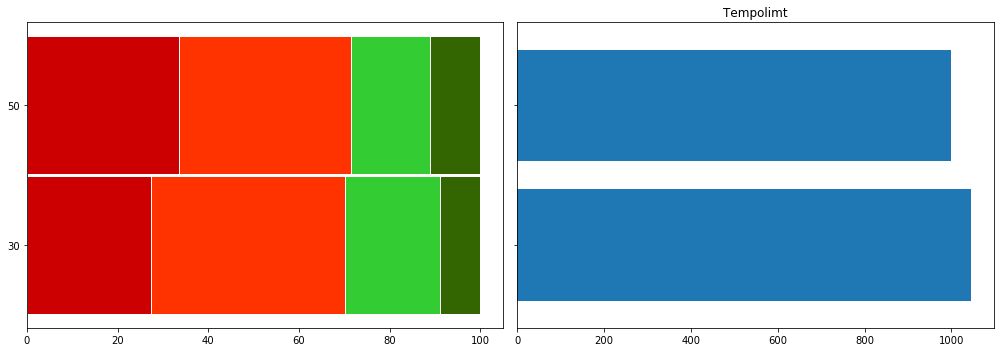

           unsafe  almost_unsafe  almost_safe       safe
group1  27.272727      42.966507    20.765550   8.995215
group2  33.633634      37.737738    17.467467  11.161161
Mittelwert von  30 - 1.1148325358851674
Mittelwert von  50 - 1.0615615615615615
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von 30 zu 50 (in Prozent) 5.018170990031338
Ist der Unterschied signifikant? True
sicher Gruppe 1  29.665071770334926 sicher Gruppe2 28.428428428428425


In [10]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz")& (df["RVA-Breite"] == 0) & (df["RVA-Lage"] != "Parken-Seitenraum")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["FS-Geschwindigkeit"] == "30")] [["rating", "sessionID"]]
group2 = df[(df["FS-Geschwindigkeit"] == "50")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Tempolimt", ["30", "50"])
group_comparison(group1,group2)

#### c2) Einflussfaktor "Tempolimit" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens) <br> *mit RVA*
Gruppe1: Kfz-Hauptverkehrsstraßen Tempolimt = "30"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Tempolimt = "50"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

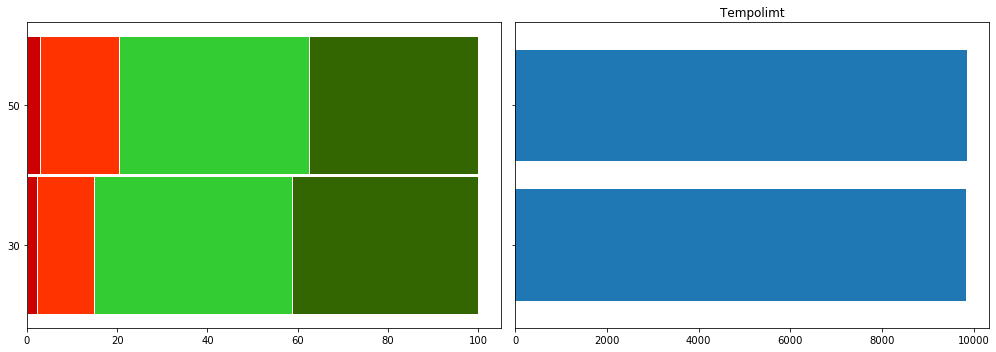

          unsafe  almost_unsafe  almost_safe       safe
group1  2.279202      12.596663    43.884819  41.239316
group2  2.890966      17.482979    42.180673  37.445382
Mittelwert von  30 - 2.240842490842491
Mittelwert von  50 - 2.1418046946448532
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von 30 zu 50 (in Prozent) 4.6240348826044455
Ist der Unterschied signifikant? True
sicher Gruppe 1  83.51648351648353 sicher Gruppe2 77.78681028350778


In [11]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["FS-Geschwindigkeit"] == "30")] [["rating", "sessionID"]]
group2 = df[(df["FS-Geschwindigkeit"] == "50")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Tempolimt", ["30", "50"])
group_comparison(group1,group2)

### d) Einflussfaktor "Verkehrsaufkommen" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens)
Gruppe1: Kfz-Hauptverkehrsstraßen Verkehrsaufkommen = "viel"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Verkehrsaufkommen = "normal"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

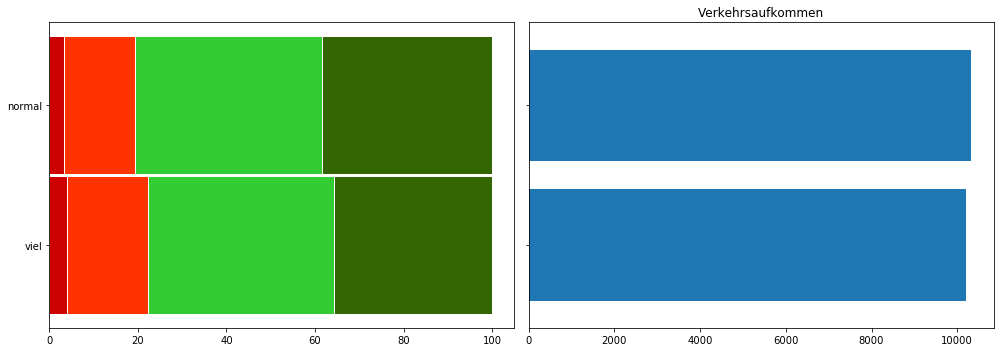

          unsafe  almost_unsafe  almost_safe       safe
group1  4.008811      18.321096    41.928536  35.741557
group2  3.373342      15.893912    42.343432  38.389314
Mittelwert von  viel - 2.0940283896231033
Mittelwert von  normal - 2.1574871745232795
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von viel zu normal (in Prozent) -2.9413284885087725
Ist der Unterschied signifikant? True
sicher Gruppe 1  75.39892315222711 sicher Gruppe2 78.73390765656761


In [12]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["FS-Aufkommen"] == "viel")] [["rating", "sessionID"]]
group2 = df[(df["FS-Aufkommen"] == "normal")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Verkehrsaufkommen", ["viel", "normal"])
group_comparison(group1,group2)

#### d0.1) Einflussfaktor ""Verkehrsaufkommen" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens) 
Gruppe1: Kfz-Hauptverkehrsstraßen Verkehrsaufkommen = "viel"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Verkehrsaufkommen = "Einbahnstraße (4-spurig)"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

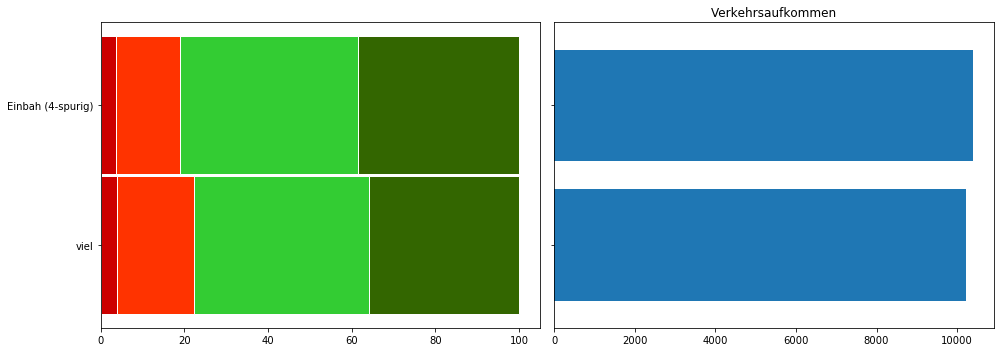

          unsafe  almost_unsafe  almost_safe       safe
group1  4.008811      18.321096    41.928536  35.741557
group2  3.653957      15.410168    42.412863  38.523012
Mittelwert von  viel - 2.0940283896231033
Mittelwert von  Einbah (4-spurig) - 2.158049297130753
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von viel zu Einbah (4-spurig) (in Prozent) -2.9666100581098416
Ist der Unterschied signifikant? True
sicher Gruppe 1  75.39892315222711 sicher Gruppe2 78.64432890429424


In [13]:
df = bike_data["ms"]
df = df[(df["FS-Aufkommen"] == "viel") & (df["RVA-Lage"] != "Parken-Seitenraum")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["FS-Art"] == "Kfz")] [["rating", "sessionID"]]
group2 = df[(df["FS-Art"] == "Einbahn")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Verkehrsaufkommen", ["viel", "Einbah (4-spurig)"])
group_comparison(group1,group2)

#### d1) Einflussfaktor ""Verkehrsaufkommen" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens) <br> *ohne RVA*
Gruppe1: Kfz-Hauptverkehrsstraßen Verkehrsaufkommen = "viel"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Verkehrsaufkommen = "normal"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

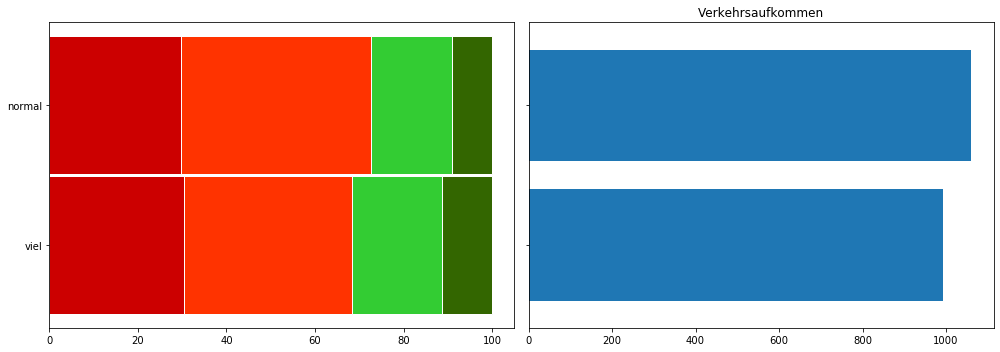

           unsafe  almost_unsafe  almost_safe       safe
group1  30.342742      38.104839    20.312500  11.239919
group2  29.641847      43.025448    18.284637   9.048068
Mittelwert von  viel - 1.1244959677419355
Mittelwert von  normal - 1.0673892554194155
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von viel zu normal (in Prozent) 5.350129957986197
Ist der Unterschied signifikant? True
sicher Gruppe 1  31.451612903225808 sicher Gruppe2 27.238454288407166


In [14]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz")& (df["RVA-Breite"] == 0) & (df["RVA-Lage"] != "Parken-Seitenraum")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["FS-Aufkommen"] == "viel")] [["rating", "sessionID"]]
group2 = df[(df["FS-Aufkommen"] == "normal")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Verkehrsaufkommen", ["viel", "normal"])
group_comparison(group1,group2)

#### d2) Einflussfaktor ""Verkehrsaufkommen" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens) <br> mit RVA

Gruppe1: Kfz-Hauptverkehrsstraßen Verkehrsaufkommen = "viel" <br>
Gruppe2: Kfz-Hauptverkehrsstraßen Verkehrsaufkommen = "normal"


Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

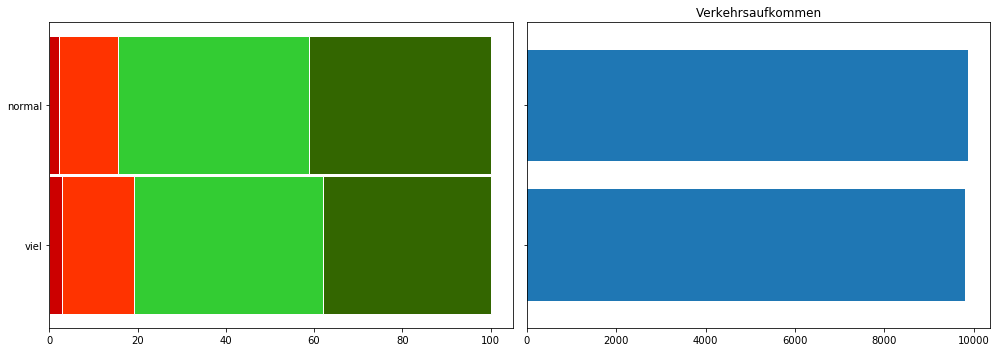

          unsafe  almost_unsafe  almost_safe       safe
group1  2.776644      16.440384    42.920580  37.862393
group2  2.248784      13.416734    43.187804  41.146677
Mittelwert von  viel - 2.1586872192731725
Mittelwert von  normal - 2.2323237439222043
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von viel zu normal (in Prozent) -3.29864899074415
Ist der Unterschied signifikant? True
sicher Gruppe 1  78.79746835443038 sicher Gruppe2 82.73905996758508


In [15]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["FS-Aufkommen"] == "viel")] [["rating", "sessionID"]]
group2 = df[(df["FS-Aufkommen"] == "normal")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Verkehrsaufkommen", ["viel", "normal"])
group_comparison(group1,group2)

### e) Einflussfaktor "Parken" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens)
Gruppe1: Kfz-Hauptverkehrsstraßen Parken = "ja"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Parken = "nein"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

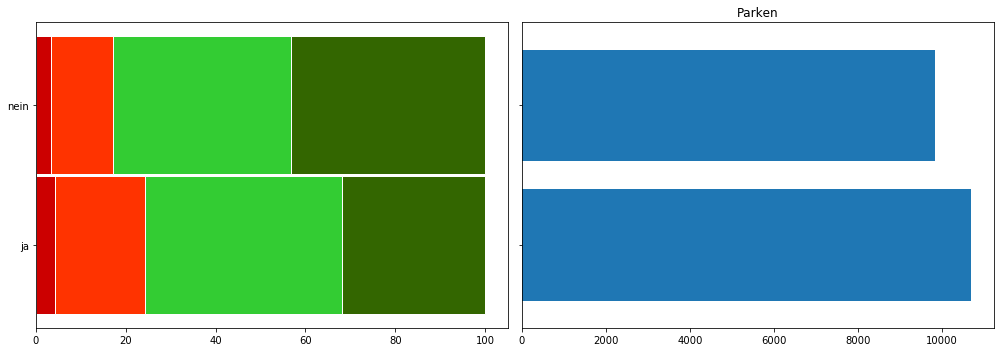

          unsafe  almost_unsafe  almost_safe       safe
group1  4.219291      20.165591    43.722518  31.892600
group2  3.376108      13.738670    39.713820  43.171402
Mittelwert von  ja - 2.03288427355225
Mittelwert von  nein - 2.226805173642937
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -8.708480759160564
Ist der Unterschied signifikant? True
sicher Gruppe 1  73.24352137711666 sicher Gruppe2 80.89418474386395


In [16]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Parken"] == "Parken längs")] [["rating", "sessionID"]]
group2 = df[(df["Parken"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Parken", ["ja", "nein"])
group_comparison(group1,group2)

#### e1) Einflussfaktor "Parken" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens) <br> ohne RVA

Gruppe1: Kfz-Hauptverkehrsstraßen Parken = "ja"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Parken = "nein"


Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

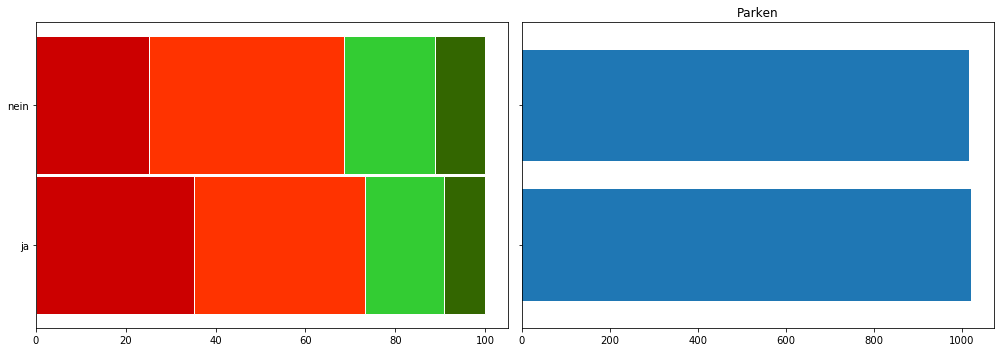

           unsafe  almost_unsafe  almost_safe       safe
group1  35.161606      38.001959    17.629775   9.206660
group2  25.246063      43.405512    20.275591  11.072835
Mittelwert von  ja - 1.0088148873653282
Mittelwert von  nein - 1.171751968503937
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -13.905424144210548
Ist der Unterschied signifikant? True
sicher Gruppe 1  26.64054848188051 sicher Gruppe2 31.200787401574804


In [17]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] == 0)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Parken"] == "Parken längs")] [["rating", "sessionID"]]
group2 = df[(df["Parken"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Parken", ["ja", "nein"])
group_comparison(group1,group2)

#### e2) Einflussfaktor "Parken" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens) <br> mit RVA

Gruppe1: Kfz-Hauptverkehrsstraßen Parken = "ja"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Parken = "nein"


Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

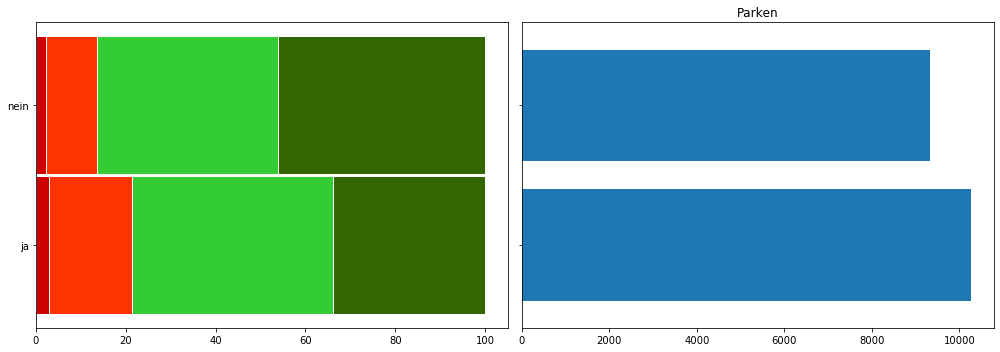

          unsafe  almost_unsafe  almost_safe       safe
group1  2.906524      18.364167    44.912366  33.816943
group2  2.207931      11.350482    40.241158  46.200429
Mittelwert von  ja - 2.0963972736124634
Mittelwert von  nein - 2.304340836012862
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -9.02399328912634
Ist der Unterschied signifikant? True
sicher Gruppe 1  76.70886075949367 sicher Gruppe2 84.85530546623794


In [18]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Parken"] == "Parken längs")] [["rating", "sessionID"]]
group2 = df[(df["Parken"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Parken", ["ja", "nein"])
group_comparison(group1,group2)

#### e2.1) Einflussfaktor "Parken" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens) <br> mit RVA, ohne baul. Trennung

Gruppe1: Kfz-Hauptverkehrsstraßen Parken = "ja"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Parken = "nein"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

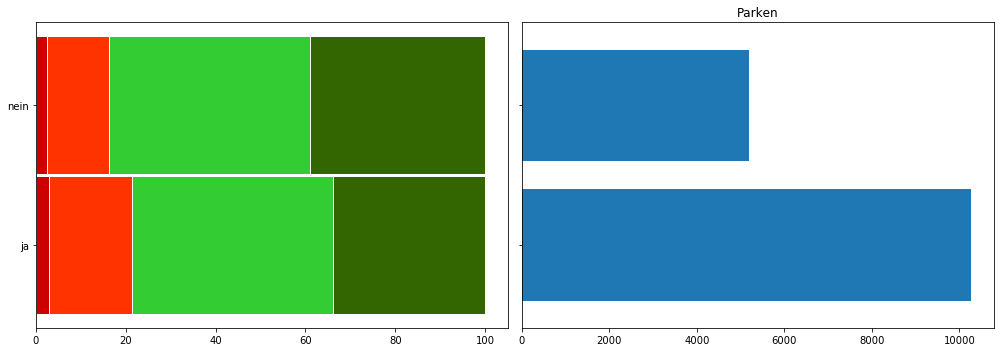

          unsafe  almost_unsafe  almost_safe       safe
group1  2.906524      18.364167    44.912366  33.816943
group2  2.398382      13.937584    44.731266  38.932768
Mittelwert von  ja - 2.0963972736124634
Mittelwert von  nein - 2.201984203429012
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -4.795081165983138
Ist der Unterschied signifikant? True
sicher Gruppe 1  76.70886075949367 sicher Gruppe2 82.75862068965519
RVA-Breite mit Parken


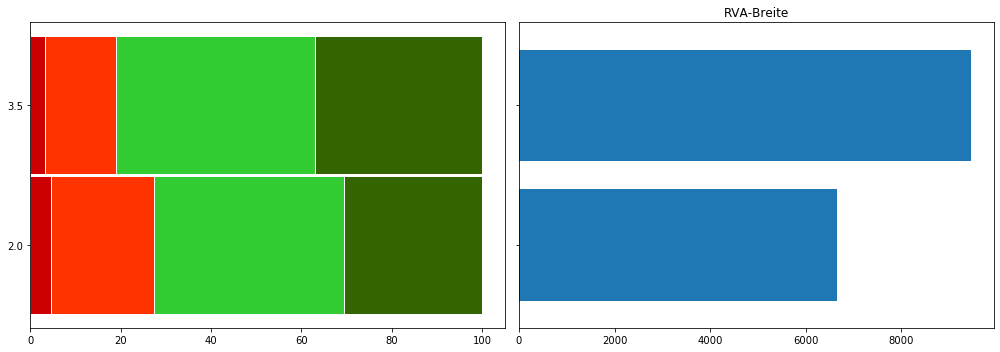

       unsafe  almost_unsafe  almost_safe       safe
2.0  4.512635      22.773767    42.208183  30.505415
3.5  3.298795      15.732713    44.079086  36.889406
RVA-Breite ohne Parken


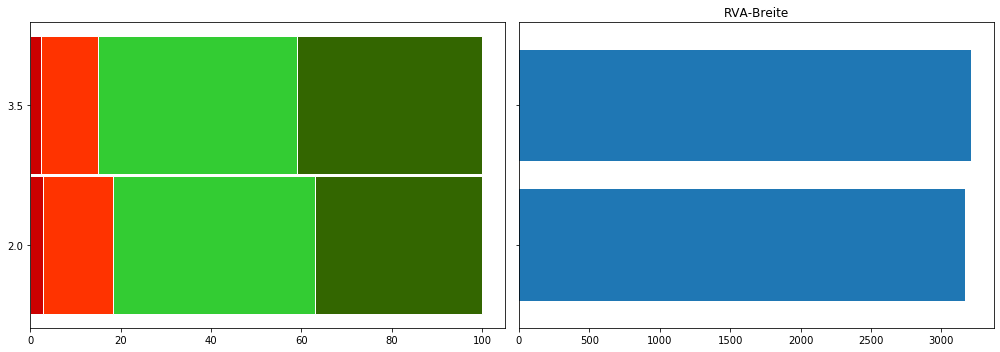

       unsafe  almost_unsafe  almost_safe       safe
2.0  2.874289      15.413771    44.662034  37.049905
3.5  2.398007      12.612893    44.004983  40.984117


In [19]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df["Tr_li-baulTrennung"] =="-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Parken"] == "Parken längs")] [["rating", "sessionID"]]
group2 = df[(df["Parken"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Parken", ["ja", "nein"])
group_comparison(group1,group2)

print ('RVA-Breite mit Parken')
df_mP=df[(df["Parken"] == "Parken längs")]
likert_plot (df_mP[["RVA-Breite","rating"]])

print ('RVA-Breite ohne Parken')
df_oP=df[(df["Parken"] == "-")]
likert_plot (df_oP[["RVA-Breite","rating"]])

### f) Einflussfaktor "Trennung links (zu fließendem Verkehr)"  (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - ohne bauliche Trennung)
Gruppe1: Kfz-Hauptverkehrsstraßen Parken = "schmal"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Parken = "breit"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

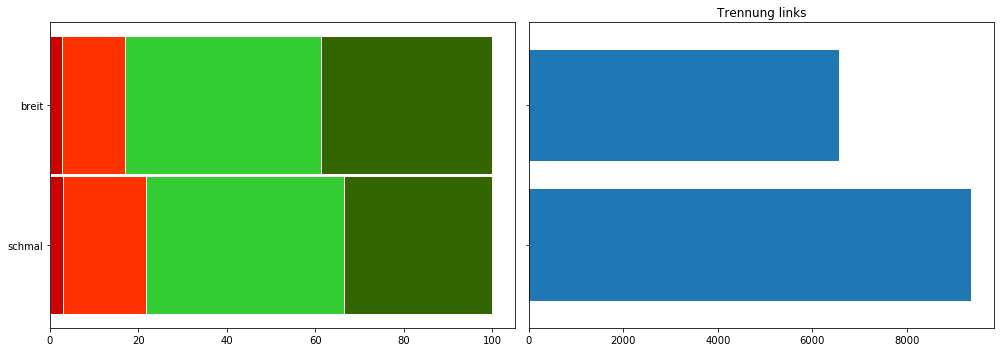

          unsafe  almost_unsafe  almost_safe       safe
group1  2.915421      18.720632    44.884665  33.479282
group2  2.708270      14.159292    44.324077  38.808361
Mittelwert von  schmal - 2.0892780862879112
Mittelwert von  breit - 2.1923252975282272
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -4.700361363183569
Ist der Unterschied signifikant? True
sicher Gruppe 1  76.30286202477573 sicher Gruppe2 82.07201708880072


In [20]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df["Tr_li-baulTrennung"] =="-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_li-Breite"] == 0.75)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung links", ["schmal", "breit"])
group_comparison(group1,group2)

#### f1) Einflussfaktor "Trennung links" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - ohne baul. Trennung) <br>mit Parken <br>
Gruppe1: Kfz-Hauptverkehrsstraßen Trennung links = "schmal"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Trennung links = "breit"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

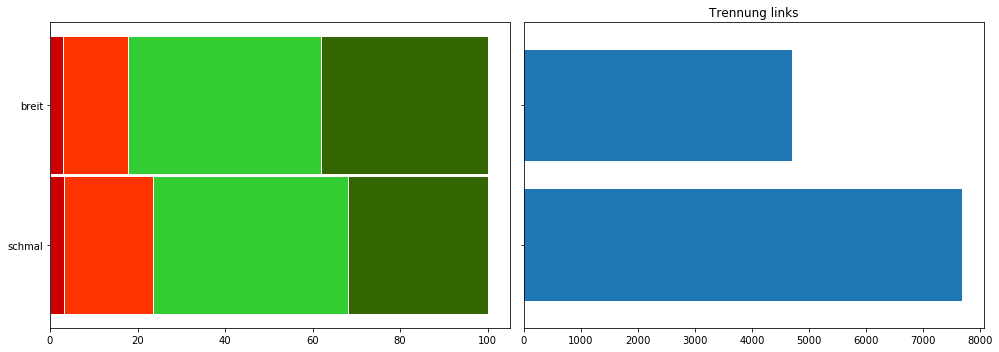

          unsafe  almost_unsafe  almost_safe       safe
group1  3.228746      20.264289    44.538472  31.968494
group2  3.028693      14.814028    44.070138  38.087141
Mittelwert von  schmal - 2.052467126676214
Mittelwert von  breit - 2.1721572794899044
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -5.510197348223224
Ist der Unterschied signifikant? True
sicher Gruppe 1  74.89910167946883 sicher Gruppe2 81.4027630180659


In [21]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df["Tr_li-baulTrennung"] =="-") & (df["Parken"] !="-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_li-Breite"] == 0.75)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung links", ["schmal", "breit"])
group_comparison(group1,group2)

#### f2) Einflussfaktor "Trennung links" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - ohne baul. Trennung) <br>ohne Parken <br>
Gruppe1: Kfz-Hauptverkehrsstraßen Trennung links = "schmal"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Trennung links = "breit"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

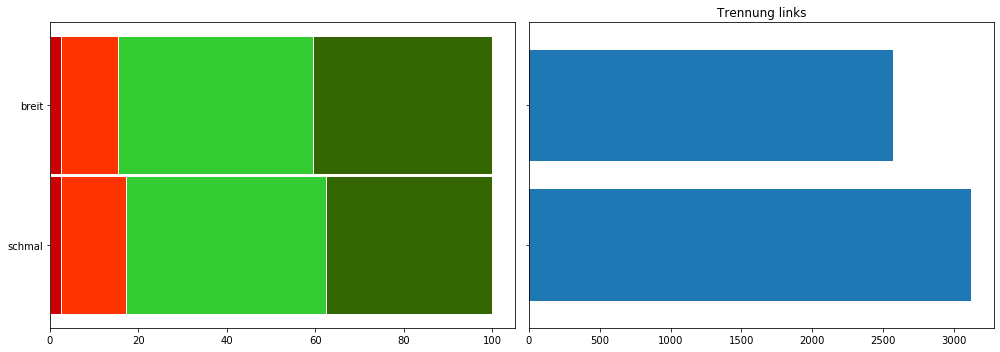

          unsafe  almost_unsafe  almost_safe       safe
group1  2.480794      14.644686    45.166453  37.708067
group2  2.531153      12.908879    44.061526  40.498442
Mittelwert von  schmal - 2.1810179257362354
Mittelwert von  breit - 2.225272585669782
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -1.9887298400445776
Ist der Unterschied signifikant? True
sicher Gruppe 1  82.29833546734955 sicher Gruppe2 84.03426791277259


In [22]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df["Tr_li-baulTrennung"] =="-") & (df["Parken"] =="-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_li-Breite"] == 0.75)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung links", ["schmal", "breit"])
group_comparison(group1,group2)

#### f3) Einflussfaktor "Trennung links - schmal" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - ohne baul. Trennung) 
Gruppe1: Kfz-Hauptverkehrsstraßen Trennung links = "durchgezogen"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Trennung links = "unterbrochen"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

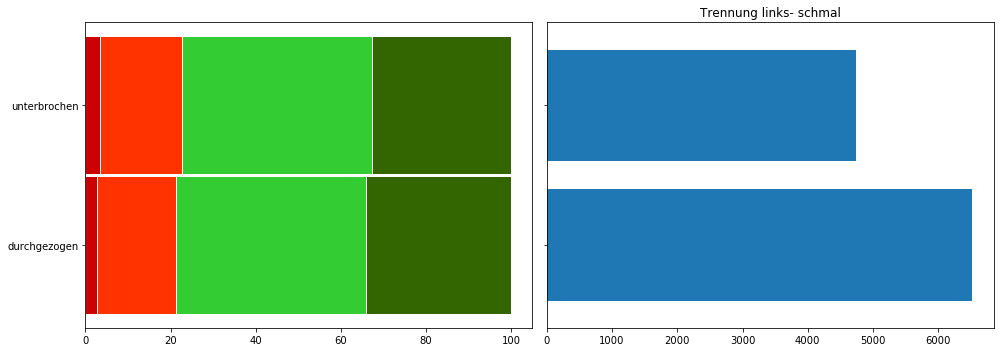

          unsafe  almost_unsafe  almost_safe       safe
group1  2.760736      18.466258    44.693252  34.079755
group2  3.443177      19.328264    44.571187  32.657372
Mittelwert von  durchgezogen - 2.100920245398773
Mittelwert von  unterbrochen - 2.0644275454161387
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von durchgezogen zu unterbrochen (in Prozent) 1.7676910029447628
Ist der Unterschied signifikant? True
sicher Gruppe 1  77.36196319018404 sicher Gruppe2 76.34136037177862


In [23]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df["Tr_li-Breite"] == 0.25) & (df["Tr_li-baulTrennung"] =="-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li-Markierung"] == "durchgezogen")] [["rating", "sessionID"]]
group2 = df[(df["Tr_li-Markierung"] == "unterbrochen")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung links- schmal", ["durchgezogen", "unterbrochen"])
group_comparison(group1,group2)

#### f4) Einflussfaktor "Trennung links - breit" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - ohne baul. Trennung) 
Gruppe1: Kfz-Hauptverkehrsstraßen Trennung links = "Sperrfläche"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Trennung links = "Doppellinie"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

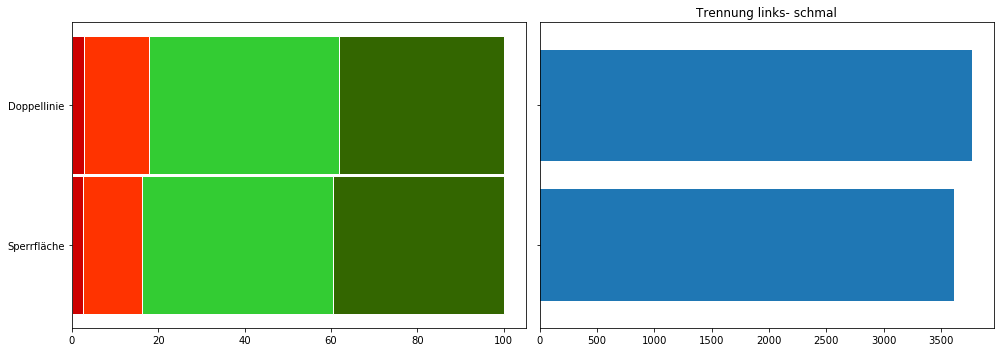

          unsafe  almost_unsafe  almost_safe       safe
group1  2.702328      13.677938    43.985588  39.634146
group2  2.825683      15.057044    44.043513  38.073760
Mittelwert von  Sperrfläche - 2.2055155210643016
Mittelwert von  Doppellinie - 2.173653488989122
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Sperrfläche zu Doppellinie (in Prozent) 1.465828488145892
Ist der Unterschied signifikant? True
sicher Gruppe 1  82.95454545454545 sicher Gruppe2 81.5070310427169


In [24]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df["Tr_li-Breite"] == 0.75) & (df["Tr_li-baulTrennung"] =="-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li-Markierung"] == "Sperrfläche")] [["rating", "sessionID"]]
group2 = df[(df["Tr_li-Markierung"] == "Doppellinie")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung links- schmal", ["Sperrfläche", "Doppellinie"])
group_comparison(group1,group2)

#### f5) Einflussfaktor "Trennung links - baul. Trennung" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens ) 
Gruppe1: Kfz-Hauptverkehrsstraßen baul. Trennung = ja <br>
Gruppe2: Kfz-Hauptverkehrsstraßen baul. Trennung = nein

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

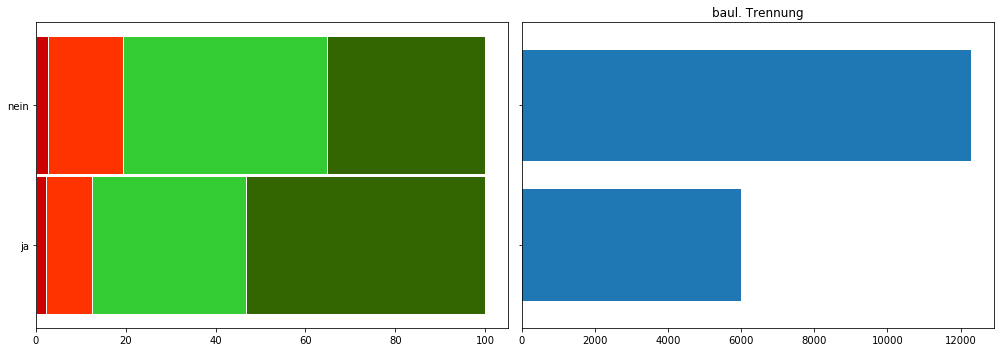

          unsafe  almost_unsafe  almost_safe       safe
group1  2.326551      10.173449    34.247832  53.252168
group2  2.611667      16.748027    45.533317  35.106989
Mittelwert von  ja - 2.3842561707805205
Mittelwert von  nein - 2.1313562769506142
Bootstrap Ergebnis: 50.0    (50.0, 50.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) 11.865678984075652
Ist der Unterschied signifikant? True
sicher Gruppe 1  86.75783855903936 sicher Gruppe2 78.25237979009032


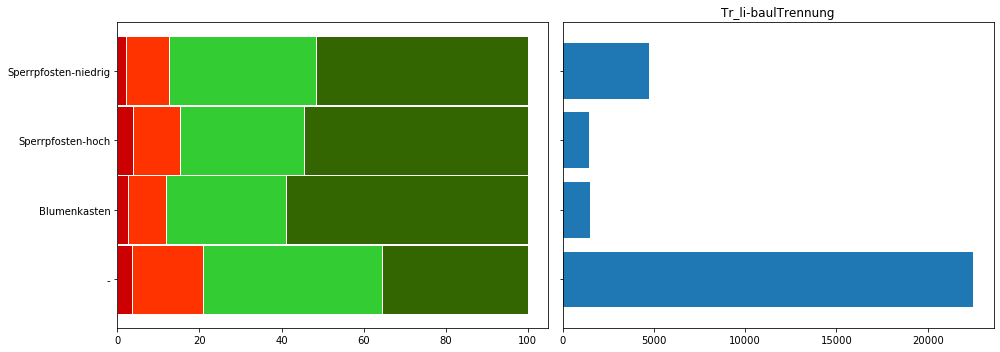

                        unsafe  almost_unsafe  almost_safe       safe
-                     3.469288      17.324201    43.597385  35.609127
Blumenkasten          2.715547       9.164969    29.192125  58.927359
Sperrpfosten-hoch     3.789474      11.508772    30.105263  54.596491
Sperrpfosten-niedrig  2.107482      10.410959    35.911486  51.570074


In [25]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li-baulTrennung"] !="-")] [["rating", "sessionID"]]
group2 = df[(df["Tr_li-baulTrennung"] =="-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "baul. Trennung", ["ja", "nein"])
group_comparison(group1,group2)

likert_plot (df[["Tr_li-baulTrennung","rating"]])


#### f5.1) Einflussfaktor "Trennung links - baul. Trennung" (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens )  <br> ohne Parken
Gruppe1: Kfz-Hauptverkehrsstraßen baul. Trennung = ja <br>
Gruppe2: Kfz-Hauptverkehrsstraßen baul. Trennung = nein

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

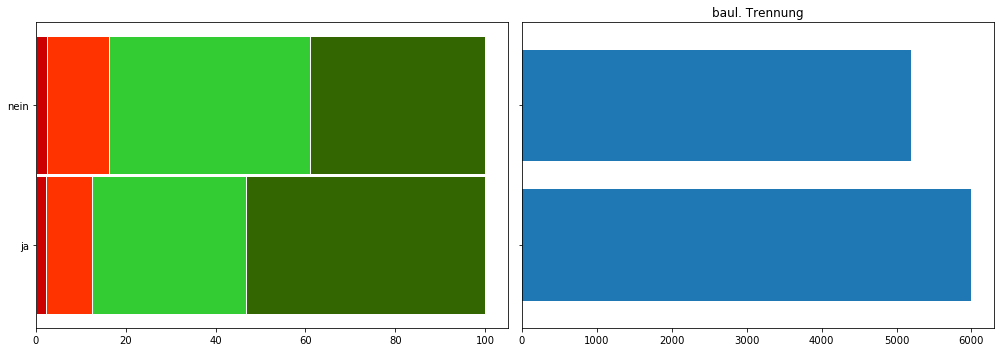

          unsafe  almost_unsafe  almost_safe       safe
group1  2.326551      10.173449    34.247832  53.252168
group2  2.398382      13.937584    44.731266  38.932768
Mittelwert von  ja - 2.3842561707805205
Mittelwert von  nein - 2.201984203429012
Bootstrap Ergebnis: 50.0    (50.0, 50.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) 8.277623748057232
Ist der Unterschied signifikant? True
sicher Gruppe 1  86.75783855903936 sicher Gruppe2 82.75862068965519


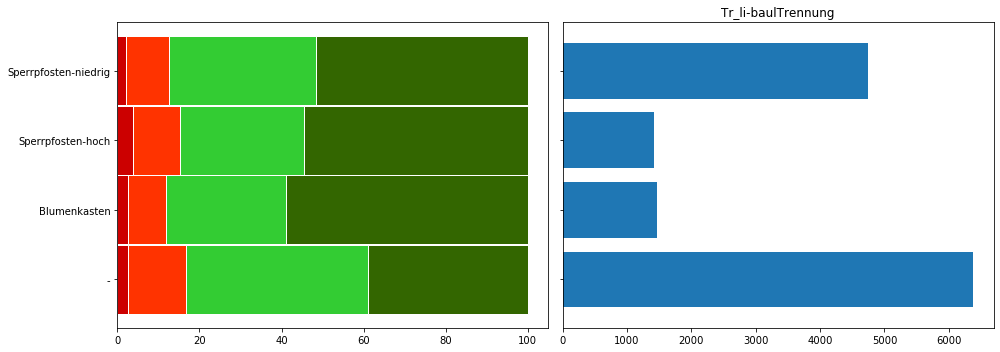

                        unsafe  almost_unsafe  almost_safe       safe
-                     2.634468      14.003450    44.331190  39.030892
Blumenkasten          2.715547       9.164969    29.192125  58.927359
Sperrpfosten-hoch     3.789474      11.508772    30.105263  54.596491
Sperrpfosten-niedrig  2.107482      10.410959    35.911486  51.570074


In [26]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df ["Parken"] == "-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li-baulTrennung"] !="-")] [["rating", "sessionID"]]
group2 = df[(df["Tr_li-baulTrennung"] =="-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "baul. Trennung", ["ja", "nein"])
group_comparison(group1,group2)

likert_plot (df[["Tr_li-baulTrennung","rating"]])

### g) Einflussfaktor "Trennung rechts (zu ruhendem Verkehr)"  (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - mit Parken)
Gruppe1: Kfz-Hauptverkehrsstraßen Trennung rechts = "schmal"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Trennung rechts = "breit"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

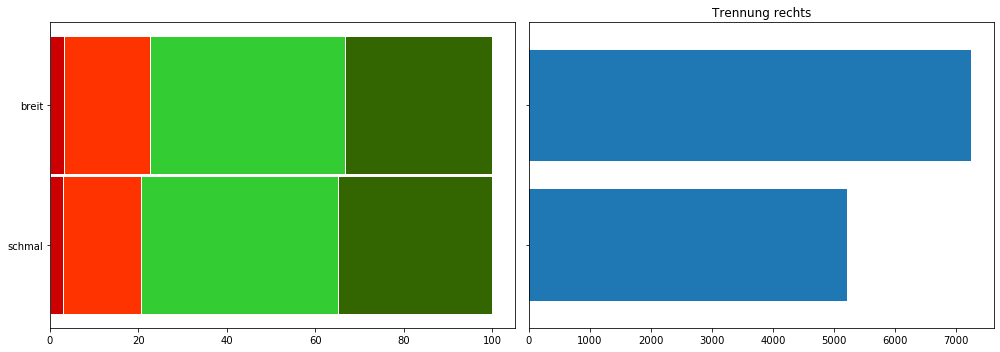

          unsafe  almost_unsafe  almost_safe       safe
group1  3.057313      17.490895    44.537090  34.914702
group2  3.265362      19.233949    44.151281  33.349408
Mittelwert von  schmal - 2.113091815219475
Mittelwert von  breit - 2.075847340865252
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) 1.7941817599505487
Ist der Unterschied signifikant? True
sicher Gruppe 1  78.47421889975081 sicher Gruppe2 75.99889776798017


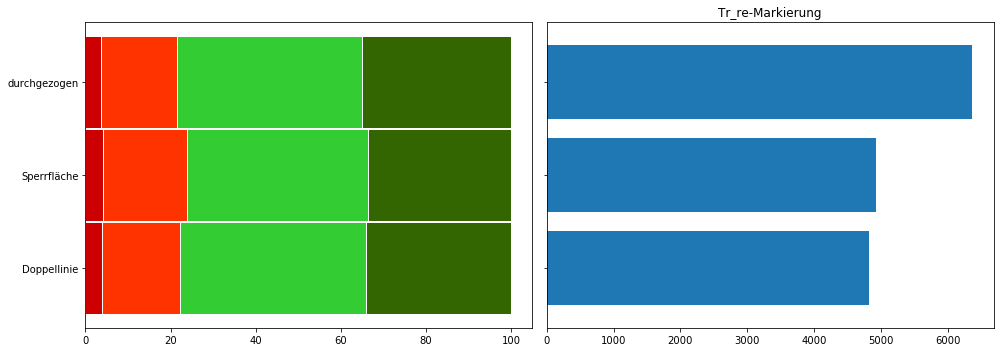

                unsafe  almost_unsafe  almost_safe       safe
Doppellinie   3.860523      18.451640    43.690328  33.997509
Sperrfläche   4.043894      19.711441    42.674253  33.570413
durchgezogen  3.565258      17.951940    43.505576  34.977226


In [27]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] != 0) & (df ["Parken"] != "-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_re-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Breite"] == 0.75)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts", ["schmal", "breit"])
group_comparison(group1,group2)

likert_plot (df[["Tr_re-Markierung","rating"]])

#### g1) Einflussfaktor "Trennung rechts (zu ruhendem Verkehr)"  (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - mit Parken) <br>schmale RVA
Gruppe1: Kfz-Hauptverkehrsstraßen Trennung rechts = "schmal"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Trennung rechts = "breit"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

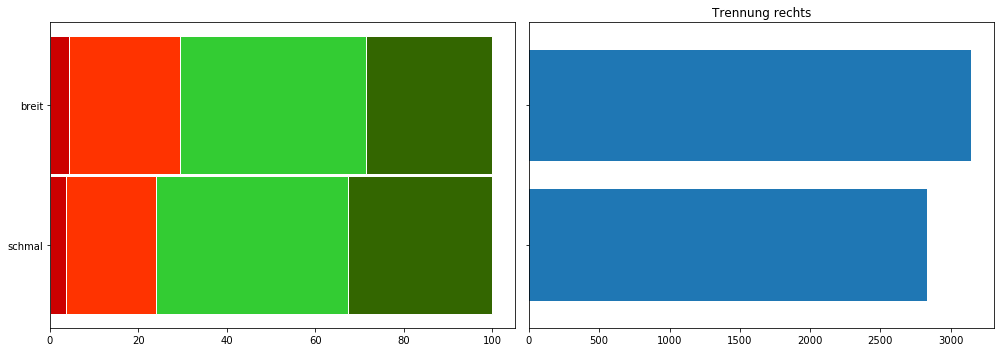

          unsafe  almost_unsafe  almost_safe       safe
group1  3.708937      20.310844    43.306252  32.673967
group2  4.337464      25.007944    42.167143  28.487448
Mittelwert von  schmal - 2.049452490286118
Mittelwert von  breit - 1.948045757864633
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) 5.205562138983982
Ist der Unterschied signifikant? True
sicher Gruppe 1  75.4150476863299 sicher Gruppe2 70.13028280902446


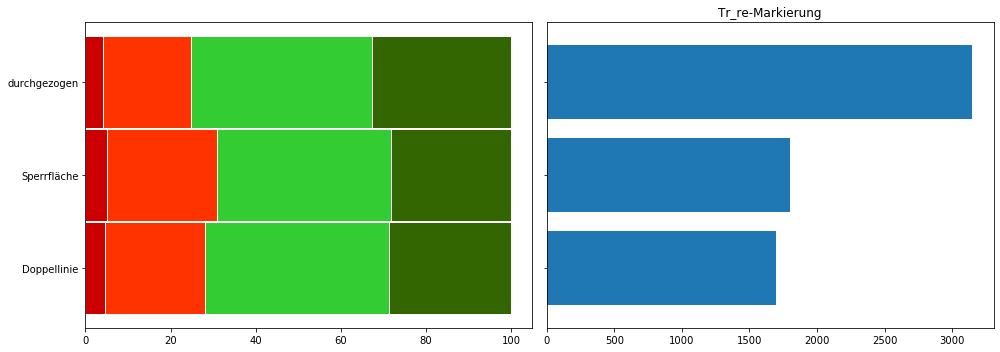

                unsafe  almost_unsafe  almost_safe       safe
Doppellinie   4.475854      23.557126    43.168433  28.798587
Sperrfläche   5.163798      25.763465    40.810661  28.262077
durchgezogen  4.160051      20.641473    42.489679  32.708796


In [28]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] == 2.0) & (df ["Parken"] != "-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_re-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Breite"] == 0.75)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts", ["schmal", "breit"])
group_comparison(group1,group2)

likert_plot (df[["Tr_re-Markierung","rating"]])

#### g2) Einflussfaktor "Trennung rechts (zu ruhendem Verkehr)"  (alle Kfz-Straßen - keine Tram - kein Bus - keine RVA-rechts des Parkens - mit Parken) <br>breite RVA
Gruppe1: Kfz-Hauptverkehrsstraßen Trennung rechts = "schmal"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen Trennung rechts = "breit"

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

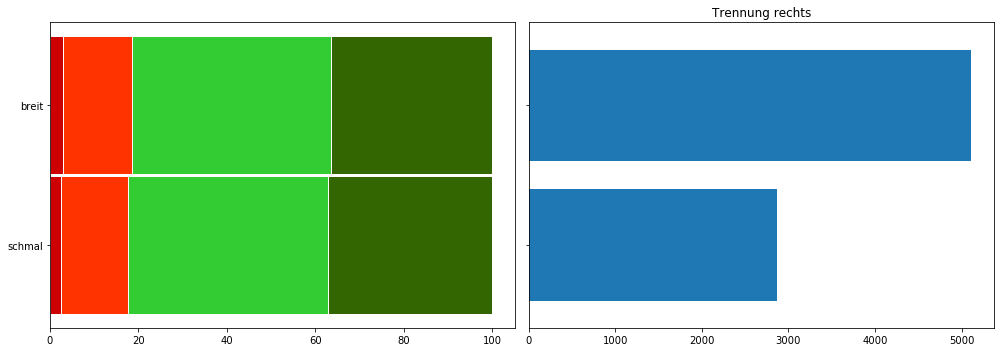

          unsafe  almost_unsafe  almost_safe       safe
group1  2.596724      14.987801    45.207389  37.208086
group2  2.952102      15.542522    44.916911  36.588465
Mittelwert von  schmal - 2.1702683861972814
Mittelwert von  breit - 2.1514173998044965
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) 0.8762124167303771
Ist der Unterschied signifikant? True
sicher Gruppe 1  81.91007319623563 sicher Gruppe2 80.64516129032258


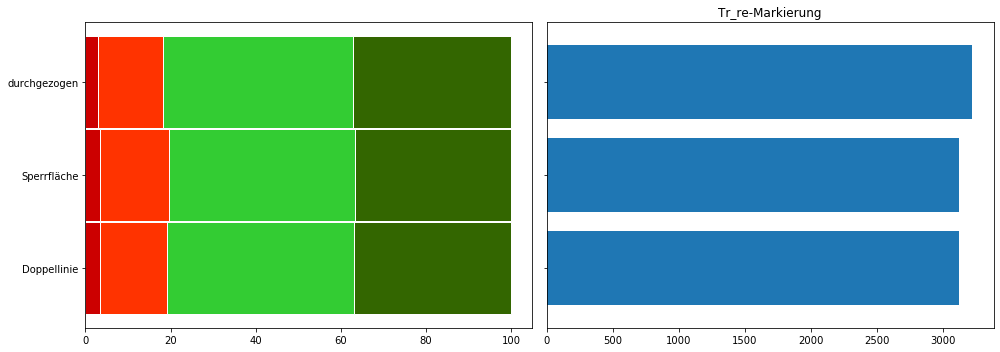

                unsafe  almost_unsafe  almost_safe       safe
Doppellinie   3.525641      15.673077    43.974359  36.826923
Sperrfläche   3.397436      16.217949    43.750000  36.634615
durchgezogen  2.983219      15.320075    44.499689  37.197017


In [29]:
df = bike_data["ms"]
df = df[(df["FS-Art"] == "Kfz") & (df["RVA-Lage"] != "Parken-Seitenraum") & (df["RVA-Breite"] == 3.5) & (df ["Parken"] != "-")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad
print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_re-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Breite"] == 0.75)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts", ["schmal", "breit"])
group_comparison(group1,group2)

likert_plot (df[["Tr_re-Markierung","rating"]])

### h) Grüneinfärbung (nur RVA)
Gruppe1: Kfz-Hauptverkehrsstraßen RVA-Oberfläche = "Asphalt"<br>
Gruppe2: Kfz-Hauptverkehrsstraßen RVA-Oberfläche = "Asphalt-farbig"

<Figure size 432x288 with 0 Axes>

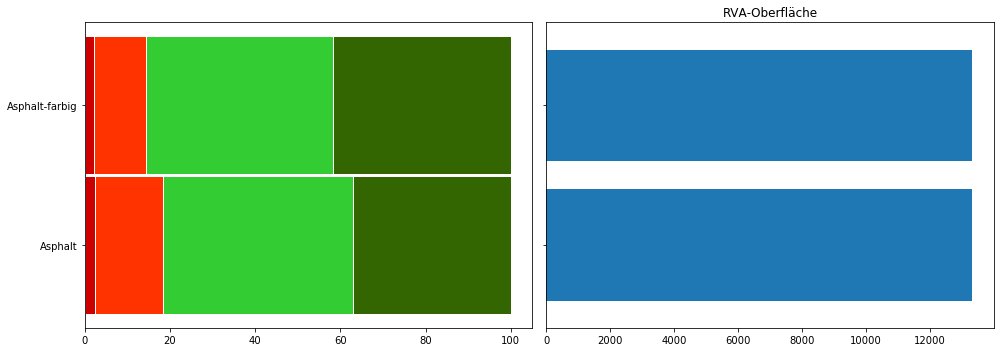

          unsafe  almost_unsafe  almost_safe       safe
group1  2.368441      16.038586    44.557466  37.035508
group2  2.083333      12.383634    43.903904  41.629129
Mittelwert von  Asphalt - 2.1626004053749717
Mittelwert von  Asphalt-farbig - 2.2507882882882884
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Asphalt zu Asphalt-farbig (in Prozent) -3.91808875904464
Ist der Unterschied signifikant? True
sicher Gruppe 1  78.80789730500712 sicher Gruppe2 83.37087087087087


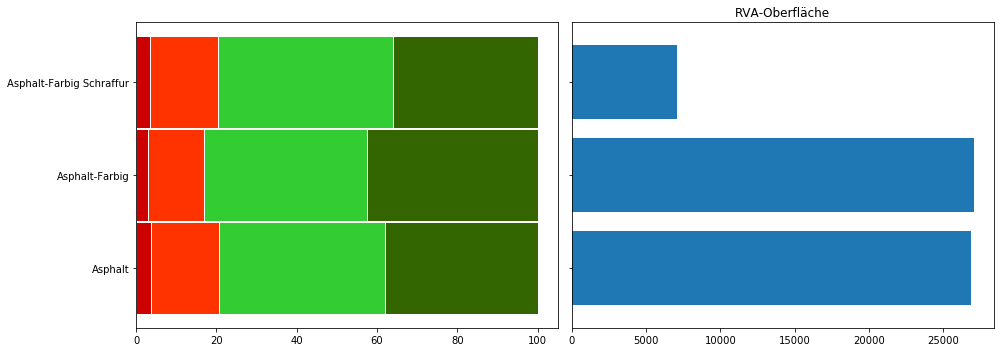

                            unsafe  almost_unsafe  almost_safe       safe
Asphalt                   3.592258      16.921134    41.349976  38.136632
Asphalt-Farbig            2.949220      13.814768    40.723631  42.512381
Asphalt-Farbig Schraffur  3.438557      16.896843    43.686584  35.978016


In [30]:
df = bike_data["ms"]
df = df[(df["RVA-Breite"] != 0)]
group1 = df[(df["RVA-Oberfläche"] == "Asphalt")] [["rating", "sessionID"]]
group2 = df[(df["RVA-Oberfläche"] == "Asphalt-Farbig")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "RVA-Oberfläche", ["Asphalt", "Asphalt-farbig"])
group_comparison(group1,group2)
likert_plot (df[["RVA-Oberfläche","rating"]])